### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [1035]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.linalg import svd
from sklearn.cluster import KMeans, DBSCAN



In [1036]:
M_df = pd.read_csv('data/telco_churn_data.csv')

In [1037]:
M_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [1038]:
##Filter the dataframe

In [1039]:
M_df = pd.read_csv('data/telco_churn_data.csv')
M_df=M_df.set_index('Customer ID')

df = M_df[['Age','Avg Monthly GB Download','Avg Monthly Long Distance Charges','Monthly Charge' ]]
#print(df['Referred a Friend'].value_counts(), "Referred a Friend") #whats in here?
#df['Friend'] = np.where(df['Referred a Friend'] == 'Yes', 1, 0) # convert object to int32.
#print(df['Internet Type'].value_counts(), "Internet Typed")     #what values are in here? 
#types = {'Fiber Optic ':1, 'DSL': 2, 'Cable': 3, 'None':4, np.nan:5}      # make a convert dictionary
#df1['Service type'] = df['Internet Type'].map(types)                      #do the conversion
#df1 = df1.fillna(5)                                                       #get rid of NaN values
#print(df1['Service type'])
#numeric_cols = df.select_dtypes(exclude='number')               #create list of non-numeric columns
#df.drop(numeric_cols, axis=1, inplace=True)                     #drop those columns
#df = df.drop(['Latitude', 'Longitude'], axis = 1)               #drop
#df = df.drop(['Number of Referrals'], axis = 1)                 #drop
#df = df.drop(['Number of Dependents'], axis = 1)
#df = df.drop(['CLTV'], axis = 1)
df = df.fillna(0)                                               #Fill any remaining na values with 0

In [1040]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 3186-AJIEK
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Monthly Charge                     7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 275.1+ KB


In [1041]:
df.describe()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Monthly Charge
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,21.110890,22.958954,65.538800
std,16.750352,20.948471,15.448113,30.606805
min,19.000000,0.000000,0.000000,18.250000
25%,32.000000,3.000000,9.210000,35.890000
50%,46.000000,17.000000,22.890000,71.968000
75%,60.000000,28.000000,36.395000,90.650000
max,80.000000,94.000000,49.990000,123.084000


In [1042]:
##Normalize the data

In [1043]:
mu = df.mean()
sigma = df.std()
norm = (df-mu)/sigma
U,Sigma,Vt = svd(norm, full_matrices=False)



## Look for r
I don't see a clear value based on the chart

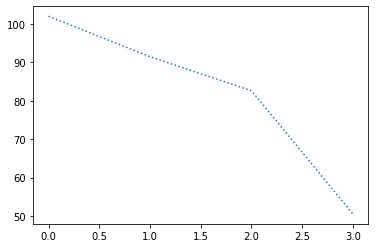

In [1044]:
plt.plot(Sigma, linestyle = 'dotted')
plt.show()

In [1045]:
##Lets try cumsum at 80%

In [1046]:
percent_variance_explained = Sigma/Sigma.sum()
print(int((np.cumsum(percent_variance_explained) < .8).sum()))

2


In [1047]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-1.794956,0.189501
1,-0.278335,2.170372
2,1.126540,1.141108
3,-0.493498,1.932081
4,-0.950642,1.176542


## Plotting the data.
There seem to be 3 main blobs. The green forms one blob, the yellow area is another blob, and then the blob in the upper left. 

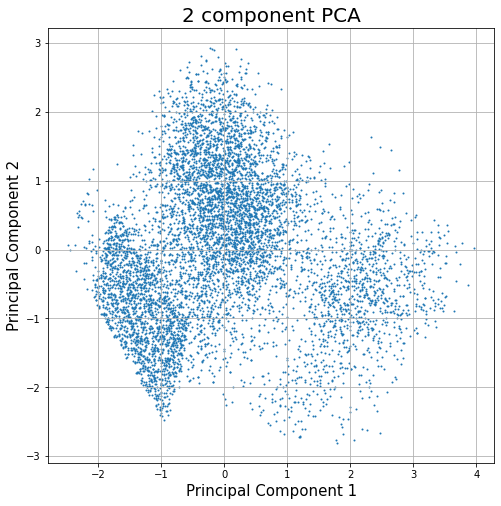

In [1048]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


ax.scatter( principalDf['principal component 1'],principalDf['principal component 2']
                              , s = 1 )

ax.grid()


In [1049]:
centroids = principalDf.sample(3, random_state = 3).reset_index(drop = True)
centroids


,principal component 1,principal component 2
0,-0.600359,2.111833
1,1.692693,-0.633504
2,-1.689666,0.190712


In [1050]:
c1 = centroids.iloc[0, :2].values
c2 = centroids.iloc[1, :2].values
c3 = centroids.iloc[2, :2].values

In [1051]:
d1 = np.linalg.norm(principalDf.iloc[:, :2] - c1, axis = 1)*2
d2 = np.linalg.norm(principalDf.iloc[:, :2] - c2, axis = 1)*2
d3 = np.linalg.norm(principalDf.iloc[:, :2] - c3, axis = 1)*2

In [1052]:
dist_df = pd.DataFrame(np.array([d1, d2, d3]).T, columns = ['d1', 'd2', 'd3'])
dist_df

,d1,d2,d3
0,4.526553,7.166877,0.210594
1,0.654603,6.854684,4.862472
2,3.962064,3.725467,5.944501
3,0.418233,6.741412,4.225249
4,1.997465,6.407336,2.464157
...,...,...,...
7038,7.158445,5.750698,3.484038
7039,4.350316,2.811070,4.860563
7040,7.285719,2.074654,8.246432
7041,8.020439,5.134402,4.766878


In [1053]:
np.argmin(dist_df.values, axis = 1) #finding smallest variance
principalDf['cluster label'] = np.argmin(dist_df.values, axis = 1) #create new column of labels
#principalDf.info()

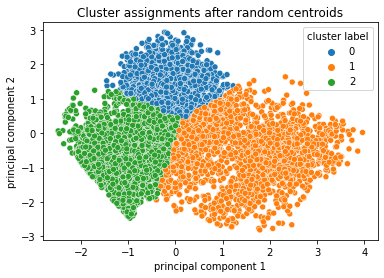

In [1054]:
X='principal component 1'
Y='principal component 2'
sns.scatterplot(data = principalDf, x = X,y = Y, hue = 'cluster label', palette='tab10')
plt.title('Cluster assignments after random centroids');

In [1055]:
new_centers = principalDf.groupby('cluster label').mean()

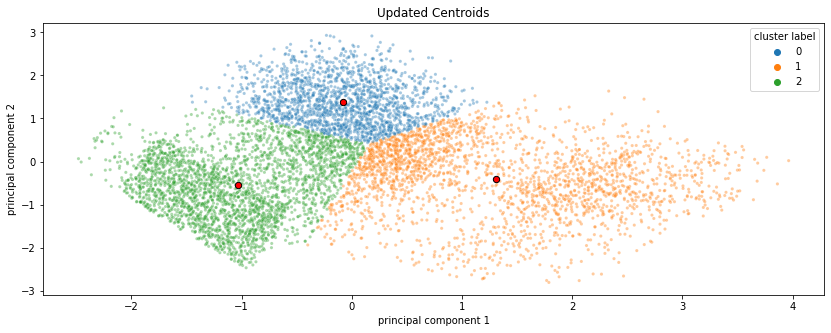

In [1056]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = principalDf, x = X,y = Y, hue = 'cluster label', palette='tab10', s = 10, alpha = 0.4)
plt.title('Updated Centroids');
plt.scatter(new_centers['principal component 1'], new_centers['principal component 2'], marker = 'o', s = 40, c = 'red', edgecolor = 'black')